In [18]:
# required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import plotly.express as px 
import seaborn as sns

# mapping imports
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [19]:
df = pd.read_csv('mod_eq_data.csv')

In [20]:
# drop unnamed col
df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)

time  latitude  longitude  depth   mag magType  \
0  2019-01-01 21:47:43.580000+00:00   18.4648   -68.4693  116.0  2.94      md   
1  2019-01-01 19:55:32.190000+00:00   18.4561   -68.8325  118.0  3.38      md   
2  2019-01-01 18:42:28.690000+00:00   18.3798   -68.0563   87.0  2.57      md   
3  2019-01-01 11:22:00.110000+00:00   18.2185   -67.0878   77.0  2.50      md   
4  2019-01-01 07:02:44.730000+00:00   18.7066   -67.5186   10.0  2.87      md   

    nst    gap    dmin   rms  ... depthError magError magNst    status  \
0   5.0  182.0  0.1007  0.50  ...       3.55     0.48    4.0  reviewed   
1   5.0  204.0  0.4548  0.17  ...       1.50     0.18    3.0  reviewed   
2   7.0  177.0  0.3517  0.42  ...       2.78     0.36    6.0  reviewed   
3  11.0  169.0  0.0428  0.08  ...       0.64     0.47    9.0  reviewed   
4  18.0  190.0  0.3246  0.38  ...       1.06     0.42   15.0  reviewed   

  locationSource  magSource                      city,region  dist_se  \
0             pr         pr   Punta Cana, Dominican Republic     14.0   
1             pr         pr    La Romana, Dominican Republic     15.0   
2             pr         pr   Punta Cana, Dominican Republic     43.0   
3             pr         pr            Mayagüez, Puerto Rico      5.0   
4             pr         pr           Aguadilla, Puerto Rico     49.0   

         city             country  
0  Punta Cana  Dominican Republic  
1   La Romana  Dominican Republic  
2  Punta Cana  Dominican Republic  
3    Mayagüez         Puerto Rico  
4   Aguadilla         Puerto Rico  

[5 rows x 26 columns]

In [21]:
df.shape

(19188, 26)

<AxesSubplot:xlabel='mag', ylabel='Count'>

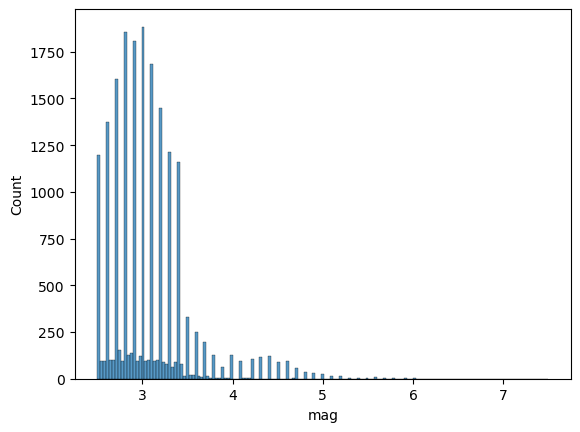

In [22]:
# plotting distribution of magnitudes

sns.histplot(data=df, x='mag')

<AxesSubplot:xlabel='mag', ylabel='Count'>

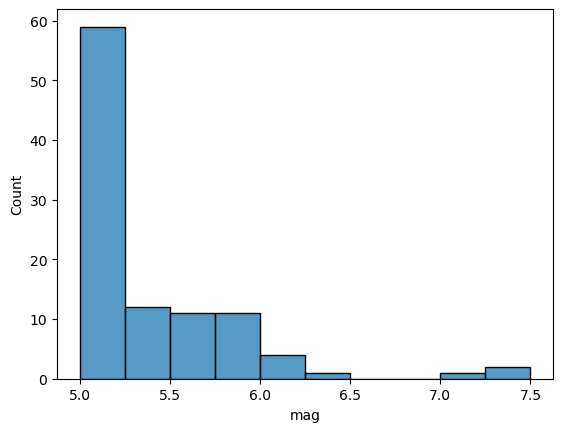

In [23]:
# Earthquakes greater than or equal to 5
sns.histplot(data=df.loc[df['mag'] >= 5], x='mag')

<AxesSubplot:xlabel='mag', ylabel='Count'>

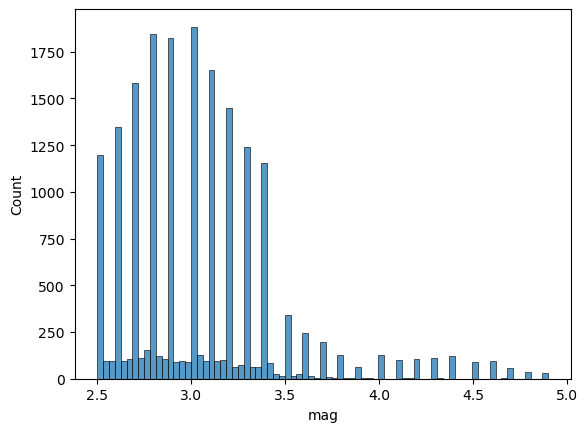

In [24]:
# Earthquakes less than 5
sns.histplot(data=df.loc[df['mag'] < 5], x='mag')

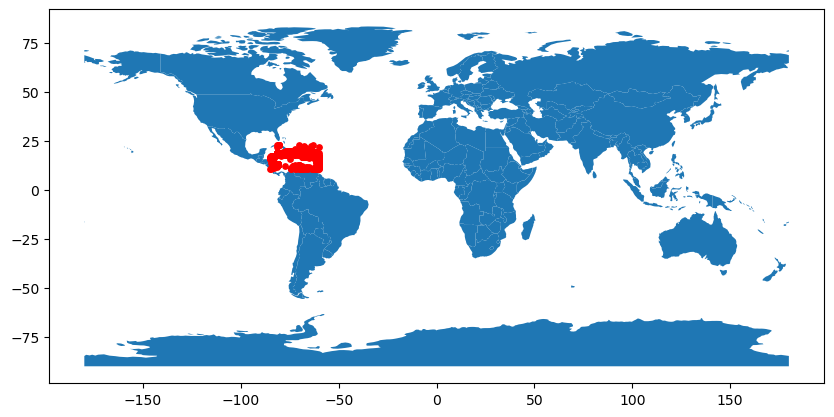

In [25]:

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [26]:
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_name="country", 
                        hover_data=["country", "mag"],
                        color='mag',
                        color_continuous_scale=color_scale,
                        size="mag",
                        zoom=8, 
                        height=500,
                        width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<AxesSubplot:xlabel='depth', ylabel='Count'>

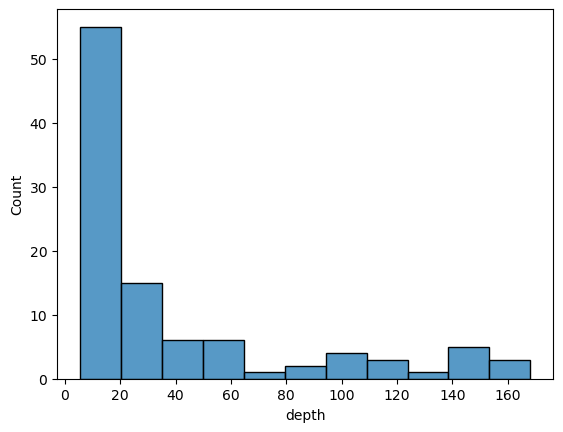

In [27]:
# Earthquakes greater than or equal to 5
sns.histplot(data=df.loc[df['mag'] >= 5], x='depth')

<AxesSubplot:xlabel='depth', ylabel='Count'>

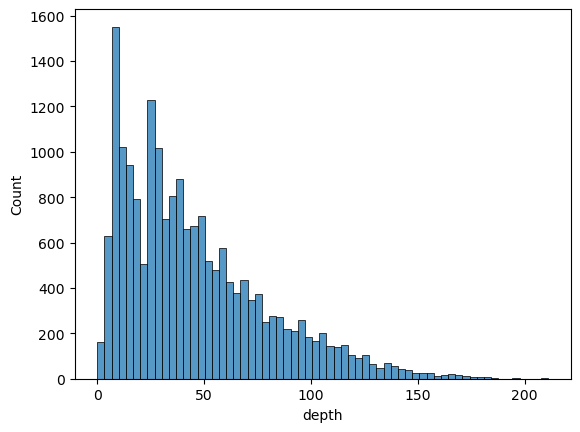

In [28]:
# Earthquakes less than or equal to 5
sns.histplot(data=df.loc[df['mag'] < 5], x='depth')

Text(0.5, 1.0, 'EQ Depth Distribution')

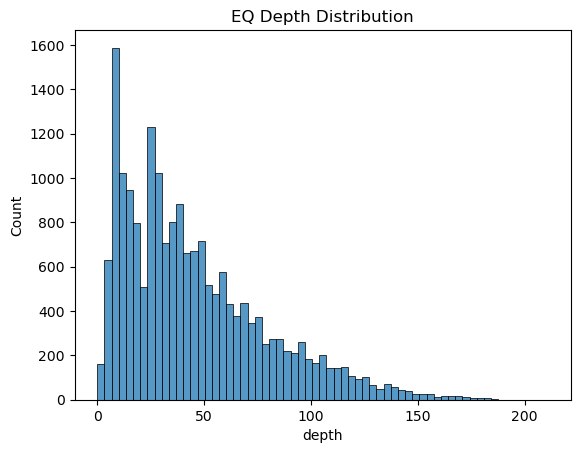

In [29]:
# Earthquakes greater than or equal to 5
sns.histplot(data=df, x='depth').set_title('EQ Depth Distribution')

# describe right skewed distribution of earthquake depth.
# imbalance of earthquakes (greater than and less than 5 mag)

In [30]:
# examing magnitude and depth over time 

#plt.plot(df.time, df.mag)

<AxesSubplot:xlabel='mag', ylabel='depth'>

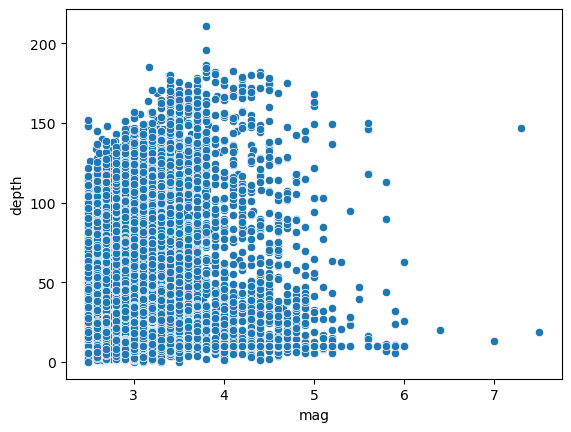

In [31]:
# mag x depth scatter 

sns.scatterplot(data=df, x='mag', y='depth')

[Text(0.5, 1.0, 'EQ Counts by Nearby Countries/Territories')]

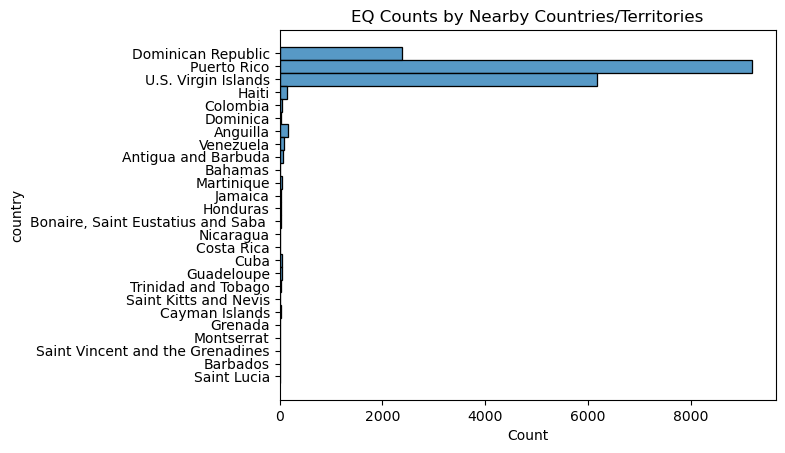

In [32]:
sns.histplot(data=df, y='country').set(title='EQ Counts by Nearby Countries/Territories')
# data is heavily imbalanced, majority of recorded earthquakes from 2009 
# and 2019 occured within or in proximity to Puerto Rico. For simplicity I will focus
# on the EQ ocurrences in Puerto Rico. This makes me curious about what may be different
# or domain specifically unique about PR for having more earthquakes 

[Text(0.5, 1.0, 'EQ Counts Greather than Mag 5.0 by Proximate Countries/Territories')]

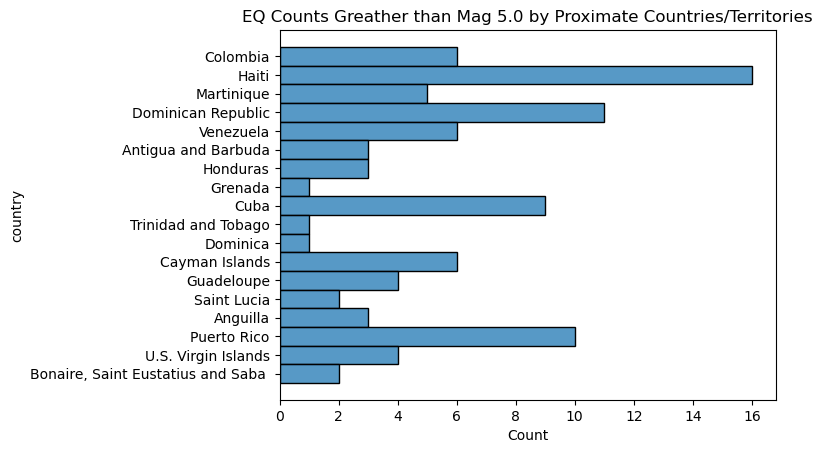

In [33]:
sns.histplot(data=df.loc[df['mag'] >= 5], y='country').set(title='EQ Counts Greather than Mag 5.0 by Proximate Countries/Territories')
# majority of  v

Text(0.5, 1.0, 'Distribution of EQ Depth near Puerto Rico')

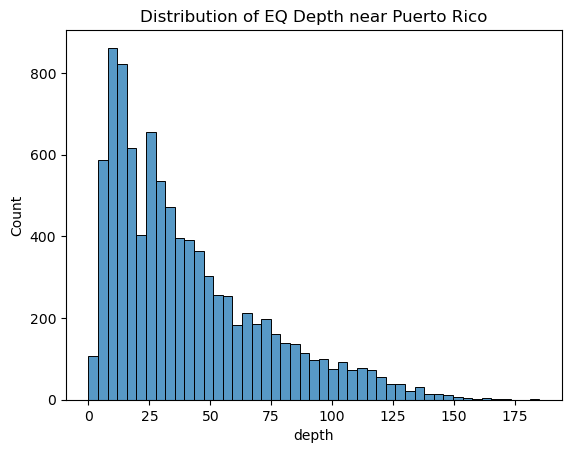

In [34]:
# look at magnitude distribution for Puerto Rico only 
sns.histplot(data=df.loc[df['country'] == 'Puerto Rico'], x='depth').set_title('Distribution of EQ Depth near Puerto Rico')

Text(0.5, 0.98, 'Stats by Country')

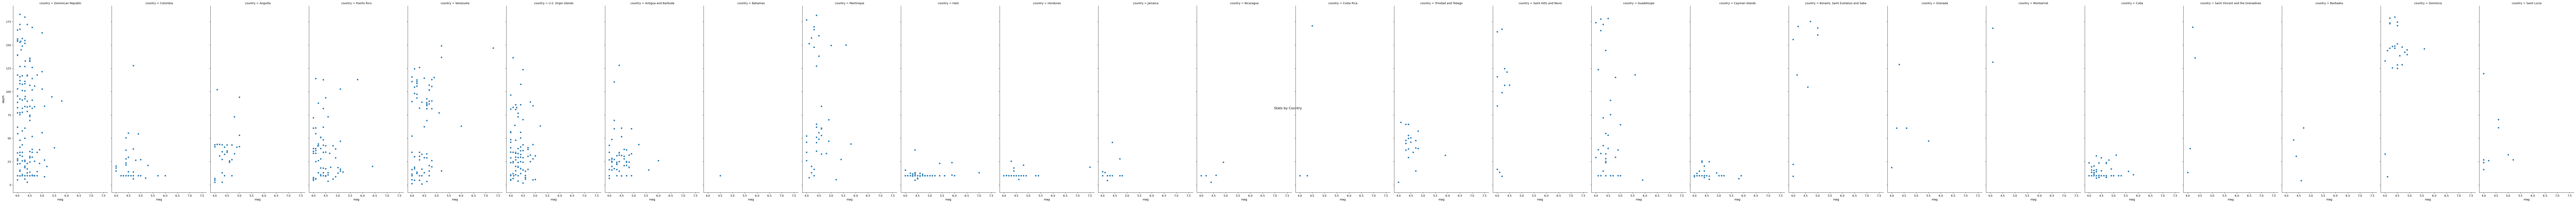

In [35]:
#create relplot
rel = sns.relplot(data=df.loc[df['mag'] >= 4], x='mag', y='depth', col='country')

#move overall title up
rel.fig.subplots_adjust(top=2)

#add overall title
rel.fig.suptitle('Stats by Country')

In [36]:
pr_df = df.loc[(df['country'] == 'Puerto Rico')]
pr_df.shape

(9183, 27)

In [45]:
df.loc[(df['country'] == 'Haiti')]

time  latitude  longitude  depth  mag  \
114  2018-12-16 16:15:45.350000+00:00   18.6468   -72.0948  10.00  3.5   
529         2018-10-17 02:05:26+00:00   20.0612   -72.9869  12.64  4.4   
576  2018-10-08 05:04:26.610000+00:00   20.2143   -72.9239  10.00  4.4   
578  2018-10-07 20:00:18.890000+00:00   20.0414   -73.0143  23.00  5.4   
586  2018-10-07 00:11:51.220000+00:00   20.0343   -73.0128  24.00  5.9   

    magType  nst   gap   dmin   rms  ... magError magNst    status  \
114      ml  NaN  80.0  0.230  0.47  ...    0.071   26.0  reviewed   
529      mb  NaN  52.0  1.662  0.94  ...    0.098   30.0  reviewed   
576      mb  NaN  79.0  1.783  0.49  ...    0.148   13.0  reviewed   
578     mww  NaN  27.0  1.655  1.13  ...    0.054   33.0  reviewed   
586     mww  NaN  19.0  1.648  0.70  ...    0.055   32.0  reviewed   

    locationSource magSource           city,region  dist_se          city  \
114             us        us      Thomazeau, Haiti      0.0     Thomazeau   
529             us        us   Port-de-Paix, Haiti     21.0  Port-de-Paix   
576             us        us   Port-de-Paix, Haiti     31.0  Port-de-Paix   
578             us        us   Port-de-Paix, Haiti     22.0  Port-de-Paix   
586             us        us   Port-de-Paix, Haiti     21.0  Port-de-Paix   

     country                    geometry  
114    Haiti  POINT (-72.09480 18.64680)  
529    Haiti  POINT (-72.98690 20.06120)  
576    Haiti  POINT (-72.92390 20.21430)  
578    Haiti  POINT (-73.01430 20.04140)  
586    Haiti  POINT (-73.01280 20.03430)  

[5 rows x 27 columns]

In [50]:
# dataframes for Haiti & PR
hat_df = df.loc[df['country'] == 'Haiti']

<AxesSubplot:xlabel='mag', ylabel='depth'>

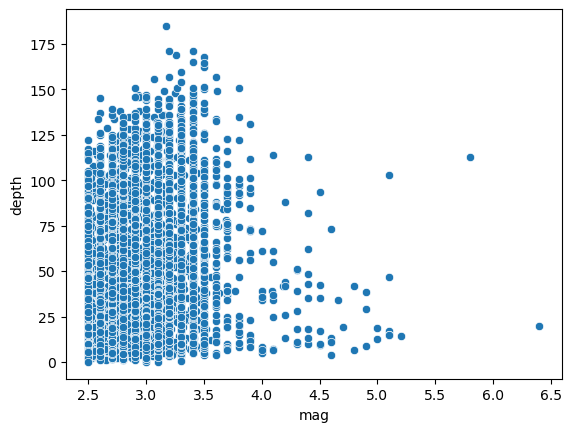

In [51]:
sns.scatterplot(data=pr_df, x='mag', y='depth')

In [52]:
# time series plots/ use colab to run large data 
# time series forecasting may not be useful since it may not be the best to forecast magnitude and eq occurences; based on previous research. 
# sns.lineplot(data=pr_df, x='time', y='mag')

In [53]:
df.loc[df['country'] == 'Puerto Rico']['magType'].unique()

array(['md', 'ml', 'mb', 'Md', 'Ml', 'Unknown', 'Mb', 'mww', 'mwr', 'mwc'],
      dtype=object)

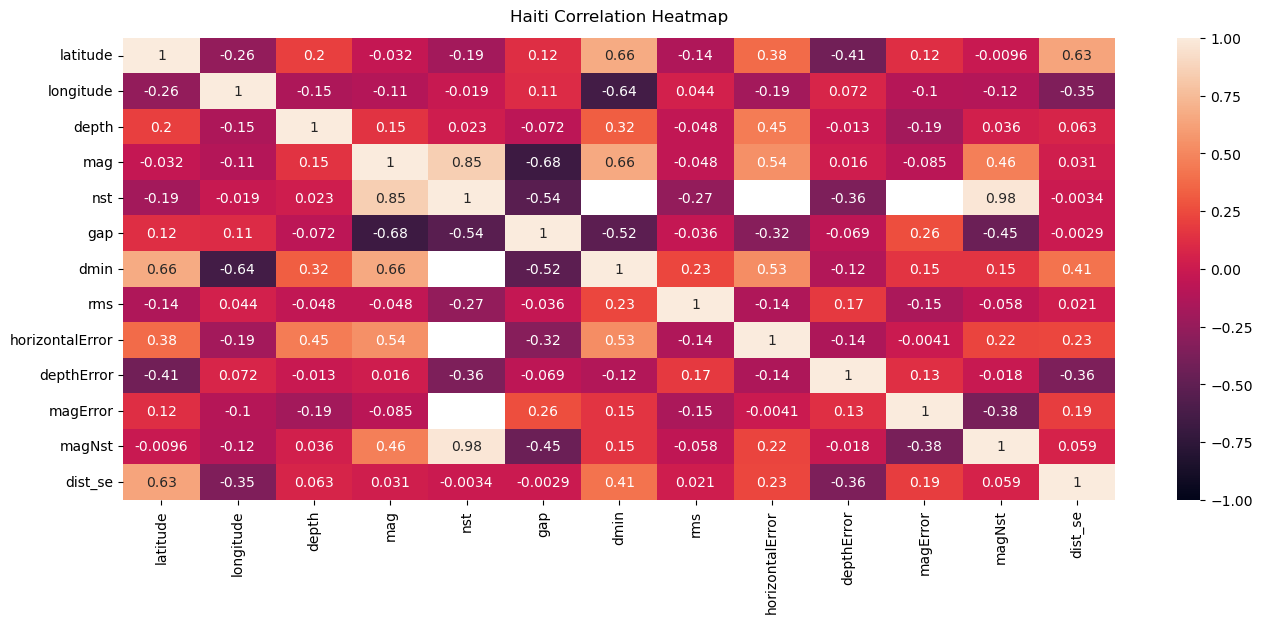

In [54]:
# correlation matrix 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(hat_df.corr(), vmin=-1, vmax=1, annot=True);

heatmap.set_title('Haiti Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

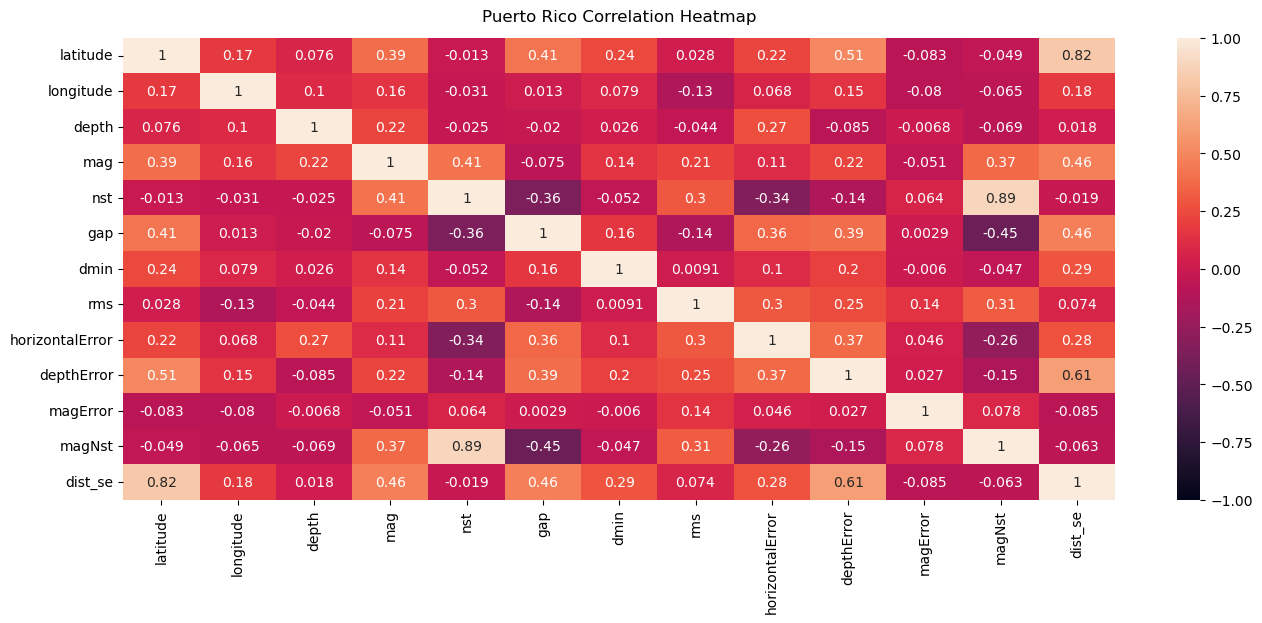

In [55]:
# correlation matrix [Puerto Rico]
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(pr_df.corr(), vmin=-1, vmax=1, annot=True);

heatmap.set_title('Puerto Rico Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [62]:
pr_df.loc[pr_df['depth'] <= 100]

time  latitude  longitude  depth   mag  \
3      2019-01-01 11:22:00.110000+00:00   18.2185   -67.0878   77.0  2.50   
4      2019-01-01 07:02:44.730000+00:00   18.7066   -67.5186   10.0  2.87   
8      2018-12-31 07:49:44.680000+00:00   18.9001   -67.3750   22.0  2.78   
9      2018-12-31 07:45:39.020000+00:00   18.4528   -66.5071   88.0  2.82   
10     2018-12-31 07:24:25.210000+00:00   17.9135   -65.9036   12.0  2.75   
...                                 ...       ...        ...    ...   ...   
19177  2009-01-02 07:03:03.670000+00:00   19.2370   -66.6400   45.1  2.90   
19181  2009-01-01 12:53:01.690000+00:00   18.5770   -67.3390   19.0  2.50   
19182  2009-01-01 11:24:04.340000+00:00   18.5880   -66.7710    6.0  2.60   
19183  2009-01-01 09:06:14.330000+00:00   19.3330   -65.7960   56.6  3.40   
19185  2009-01-01 08:22:18.780000+00:00   19.4250   -65.6800   61.6  3.20   

      magType   nst    gap    dmin   rms  ... magError magNst    status  \
3          md  11.0  169.0  0.0428  0.08  ...     0.47    9.0  reviewed   
4          md  18.0  190.0  0.3246  0.38  ...     0.42   15.0  reviewed   
8          md   7.0  328.0  0.5067  0.18  ...     0.33    6.0  reviewed   
9          md  13.0  157.0  0.0330  0.20  ...     0.28   10.0  reviewed   
10         md  15.0  269.0  0.1581  0.15  ...     0.59   14.0  reviewed   
...       ...   ...    ...     ...   ...  ...      ...    ...       ...   
19177      md   4.0  297.7     NaN   NaN  ...      NaN    NaN  reviewed   
19181      md   5.0  313.4     NaN   NaN  ...      NaN    NaN  reviewed   
19182      md   7.0  223.2     NaN   NaN  ...      NaN    NaN  reviewed   
19183      md   4.0  315.8     NaN   NaN  ...      NaN    NaN  reviewed   
19185      md   4.0  345.7     NaN   NaN  ...      NaN    NaN  reviewed   

      locationSource magSource                city,region  dist_se  \
3                 pr        pr      Mayagüez, Puerto Rico      5.0   
4                 pr        pr     Aguadilla, Puerto Rico     49.0   
8                 pr        pr   San Antonio, Puerto Rico     53.0   
9                 pr        pr      La Luisa, Puerto Rico      0.0   
10                pr        pr      Emajagua, Puerto Rico      9.0   
...              ...       ...                        ...      ...   
19177           rspr      rspr       Arecibo, Puerto Rico     85.0   
19181           rspr      rspr     Aguadilla, Puerto Rico     25.0   
19182           rspr      rspr    Carrizales, Puerto Rico     11.0   
19183           rspr      rspr        Suárez, Puerto Rico    100.0   
19185           rspr      rspr        Suárez, Puerto Rico    111.0   

              city      country                    geometry  
3         Mayagüez  Puerto Rico  POINT (-67.08780 18.21850)  
4        Aguadilla  Puerto Rico  POINT (-67.51860 18.70660)  
8      San Antonio  Puerto Rico  POINT (-67.37500 18.90010)  
9         La Luisa  Puerto Rico  POINT (-66.50710 18.45280)  
10        Emajagua  Puerto Rico  POINT (-65.90360 17.91350)  
...            ...          ...                         ...  
19177      Arecibo  Puerto Rico  POINT (-66.64000 19.23700)  
19181    Aguadilla  Puerto Rico  POINT (-67.33900 18.57700)  
19182   Carrizales  Puerto Rico  POINT (-66.77100 18.58800)  
19183       Suárez  Puerto Rico  POINT (-65.79600 19.33300)  
19185       Suárez  Puerto Rico  POINT (-65.68000 19.42500)  

[8576 rows x 27 columns]

In [ ]:
# save subset dataframes to .csv
#df_HAT.to_csv('Haiti_EQ.csv', index=False)
#df_PR.to_csv('Puerto_Rico_EQ.csv', index=False)
